In [323]:
import torch
from torch import optim
import seaborn as sns
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
from torch.utils import data
import ssl
from MaSS import MaSS

sns.set_theme()
torch.manual_seed(0)
ssl._create_default_https_context = ssl._create_unverified_context

In [324]:

def rastrigin(tensor):
    # https://en.wikipedia.org/wiki/Test_functions_for_optimization
    # https://github.com/jettify/pytorch-optimizer/blob/master/examples/viz_optimizers.py

    x, y = tensor
    A = 1
    f = (
        A * 2
        + (x ** 2 - A * torch.cos(x * math.pi * 2))
        + (y ** 2 - A * torch.cos(y * math.pi * 2))
    )
    return f

In [325]:
# SGD
p_sgd = torch.tensor([[5.],[5.]], requires_grad=True)
sgd = optim.SGD([p_sgd], lr=0.01)
lossSgd = np.empty((2,0))
lossSgd = np.append(lossSgd, p_sgd.data.numpy(),axis=1)

# SGD + Momentum
p_mom = torch.tensor([[5.],[5.]], requires_grad=True)
mom = optim.SGD([p_mom], lr=0.01, momentum=0.9)
lossSgdMom = np.empty((2,0))
lossSgdMom = np.append(lossSgdMom, p_mom.data.numpy(),axis=1)

# SGD + nesterov
p_nest = torch.tensor([[5.],[5.]], requires_grad=True)
nest = optim.SGD([p_nest], lr=0.01, nesterov=True, momentum=0.8)
lossSgdNest = np.empty((2,0))
lossSgdNest = np.append(lossSgdNest, p_nest.data.numpy(),axis=1)

# Adam
p_adam = torch.tensor([[5.],[5.]], requires_grad=True)
adam = optim.Adam([p_adam], lr=0.01)
lossAdam = np.empty((2,0))
lossAdam = np.append(lossAdam, p_adam.data.numpy(),axis=1)

# MaSS
p_mass = torch.tensor([[5.],[5.]], requires_grad=True)
mass = MaSS([p_mass], lr=0.01, alpha=0.05, kappa_t=15)
lossMass = np.empty((2,0))
lossMass = np.append(lossMass, p_mass.data.numpy(),axis=1)


In [326]:
def Optimiser(p, opt, loss, iterate):

    for i in range(iterate):
        opt.zero_grad()
        output = rastrigin(p)
        output.backward()
        opt.step()
        loss = np.append(loss, p.data.numpy(), axis=1)

    return loss

In [327]:
lossSgd = Optimiser(p_sgd, sgd, lossSgd, 100)
lossSgdMom = Optimiser(p_mom, mom, lossSgdMom, 100)
lossSgdNest = Optimiser(p_nest, nest, lossSgdNest, 100)
lossAdam = Optimiser(p_adam, adam, lossAdam, 100)
lossMass = Optimiser(p_mass, mass, lossMass, 100)

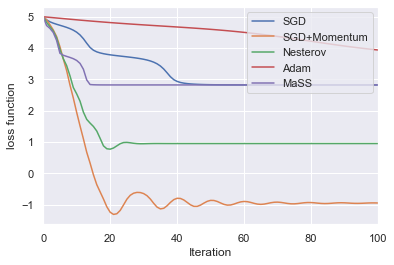

In [328]:
plt.plot(np.arange(0,101,1),lossSgd[0], label='SGD')
plt.plot(np.arange(0,101,1),lossSgdMom[0], label='SGD+Momentum')
plt.plot(np.arange(0,101,1),lossSgdNest[0], label='Nesterov')
plt.plot(np.arange(0,101,1),lossAdam[0], label='Adam')
plt.plot(np.arange(0,101,1),lossMass[0], label='MaSS')

plt.xlim(0,100)
plt.xlabel('Iteration')
plt.ylabel('loss function')
plt.legend(loc="upper right")
plt.show()


In [329]:
xmin, xmax, xstep = -5.12, 5.12, .2
ymin, ymax, ystep = -5.12, 5.12, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = rastrigin(torch.tensor([x, y])).numpy()

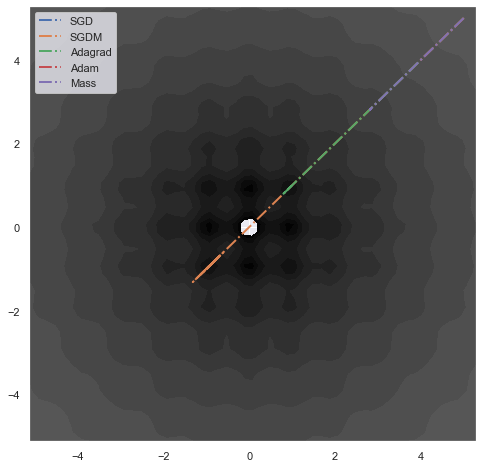

In [330]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)
ax.plot(lossSgd[0], lossSgd[1], label='SGD', linewidth=2, linestyle='-.')
ax.plot(lossSgdMom[0], lossSgdMom[1], label='SGDM', linewidth=2, linestyle='-.')
ax.plot(lossSgdNest[0], lossSgdNest[1], label='Adagrad', linewidth=2, linestyle='-.')
ax.plot(lossAdam[0], lossAdam[1], label='Adam', linewidth=2, linestyle='-.')
ax.plot(lossMass[0], lossMass[1], label='Mass', linewidth=2, linestyle='-.')

ax.legend()
